In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

In [2]:
data_train = pd.read_csv("C:/Users/ranja/Downloads/FINAL_HACKATHON/Train_Data.csv")
data_test = pd.read_csv("C:/Users/ranja/Downloads/FINAL_HACKATHON/Test_Data.csv")

In [3]:
data_train.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [4]:
data_train.shape,data_test.shape

((25920, 18), (6480, 17))

In [5]:
data_train.dtypes

ID1                            int64
Specific ailments              int64
ID2                            int64
Food preference               object
Age                            int64
BMI                          float64
Smoker?                       object
Living in?                    object
Any heriditary condition?     object
Follow Diet                  float64
Physical activity            float64
Regular sleeping hours       float64
Alcohol consumption          float64
Social interaction           float64
Taking supplements           float64
Mental health management     float64
Illness count last year      float64
Healthy                        int64
dtype: object

In [6]:
data_train.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [7]:
data_train.describe()

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
count,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,25920.000000
mean,16503.583989,26.502701,6256.104282,33.235610,23.461925,0.895739,0.138053,0.184391,0.084219,0.396881,0.053073,0.000401,1.752756,0.628858
std,9522.571120,15.056563,3611.224659,19.532157,3.791150,0.305605,0.344962,0.387810,0.277721,0.489261,0.224183,0.020018,0.767824,0.483120
min,1.000000,0.000000,1.000000,0.000000,1.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8251.750000,13.000000,3151.000000,16.000000,20.214882,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16531.500000,26.000000,6246.000000,33.000000,23.415330,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24701.500000,40.000000,9391.250000,50.000000,26.768378,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [8]:
data_train['Follow Diet'] = data_train['Follow Diet'].fillna(data_train['Follow Diet'].median())

In [9]:
data_train['Physical activity'] = data_train['Physical activity'].fillna(data_train['Physical activity'].median())

In [10]:
data_train['Regular sleeping hours'] = data_train['Regular sleeping hours'].fillna(data_train['Regular sleeping hours'].median())

In [11]:
data_train['Alcohol consumption'] = data_train['Alcohol consumption'].fillna(data_train['Alcohol consumption'].median())

In [12]:
data_train['Social interaction'] = data_train['Social interaction'].fillna(data_train['Social interaction'].median())

In [13]:
data_train['Taking supplements'] = data_train['Taking supplements'].fillna(data_train['Taking supplements'].median())

In [14]:
data_train['Mental health management'] = data_train['Mental health management'].fillna(data_train['Mental health management'].median())

In [15]:
data_train['Illness count last year'] = data_train['Illness count last year'].fillna(data_train['Illness count last year'].median())

In [16]:
data_train['Food preference'] = data_train['Food preference'].fillna(data_train['Food preference'].mode()[0])

In [17]:
object_cols = [col for col in data_train.columns if data_train[col].dtype == "object"]

In [18]:
numerical_cols = [cname for cname in data_train.columns if 
                data_train[cname].dtype in ['int64', 'float64']]

In [19]:
### Number of unique data in object_cols

object_nunique = list(map(lambda col: data_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))
sorted(d.items(), key=lambda x: x[1])

[('Any heriditary condition?', 1),
 ('Living in?', 2),
 ('Smoker?', 3),
 ('Food preference', 32)]

In [20]:
data_train['Smoker?'].unique()

array(['NO', 'YES', 'Cannot say'], dtype=object)

In [21]:
data_train.isnull().sum()

ID1                          0
Specific ailments            0
ID2                          0
Food preference              0
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Any heriditary condition?    0
Follow Diet                  0
Physical activity            0
Regular sleeping hours       0
Alcohol consumption          0
Social interaction           0
Taking supplements           0
Mental health management     0
Illness count last year      0
Healthy                      0
dtype: int64

In [22]:
data_train.describe()

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
count,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000
mean,16503.583989,26.502701,6256.104282,33.235610,23.461925,0.899653,0.132870,0.177469,0.081057,0.381983,0.051080,0.000386,1.762037,0.628858
std,9522.571120,15.056563,3611.224659,19.532157,3.791150,0.300468,0.339441,0.382073,0.272928,0.485882,0.220166,0.019638,0.754738,0.483120
min,1.000000,0.000000,1.000000,0.000000,1.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8251.750000,13.000000,3151.000000,16.000000,20.214882,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16531.500000,26.000000,6246.000000,33.000000,23.415330,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24701.500000,40.000000,9391.250000,50.000000,26.768378,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


## Data Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [24]:
data_train['Any heriditary condition?'] = lab_enc.fit_transform(data_train['Any heriditary condition?'])
data_train['Living in?'] = lab_enc.fit_transform(data_train['Living in?'])
data_train['Smoker?'] = lab_enc.fit_transform(data_train['Smoker?'])
data_train['Food preference'] = lab_enc.fit_transform(data_train['Food preference'])

In [25]:
data_train

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,31,49,20.500470,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,25,20,26.076580,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,31,1,21.420866,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,0,30,25.203247,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,31,40,19.355846,2,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,31,58,25.515286,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,21001,39,11500,31,16,27.094959,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,4263,44,2796,0,8,28.602921,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,11208,52,12190,0,52,21.909832,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [26]:
data_train.nunique().to_frame("No of unique values")

,No of unique values
ID1,25920
Specific ailments,53
ID2,10941
Food preference,32
Age,76
BMI,10941
Smoker?,3
Living in?,2
Any heriditary condition?,1
Follow Diet,2


In [27]:
data_train["Illness count last year"].unique()

array([1., 2., 3., 4., 5.])

## Exploratory Data Analysis(EDA)

In [28]:
import warnings
warnings.filterwarnings('ignore')

### Univariate Analysis

In [29]:
data_train.shape

(25920, 18)

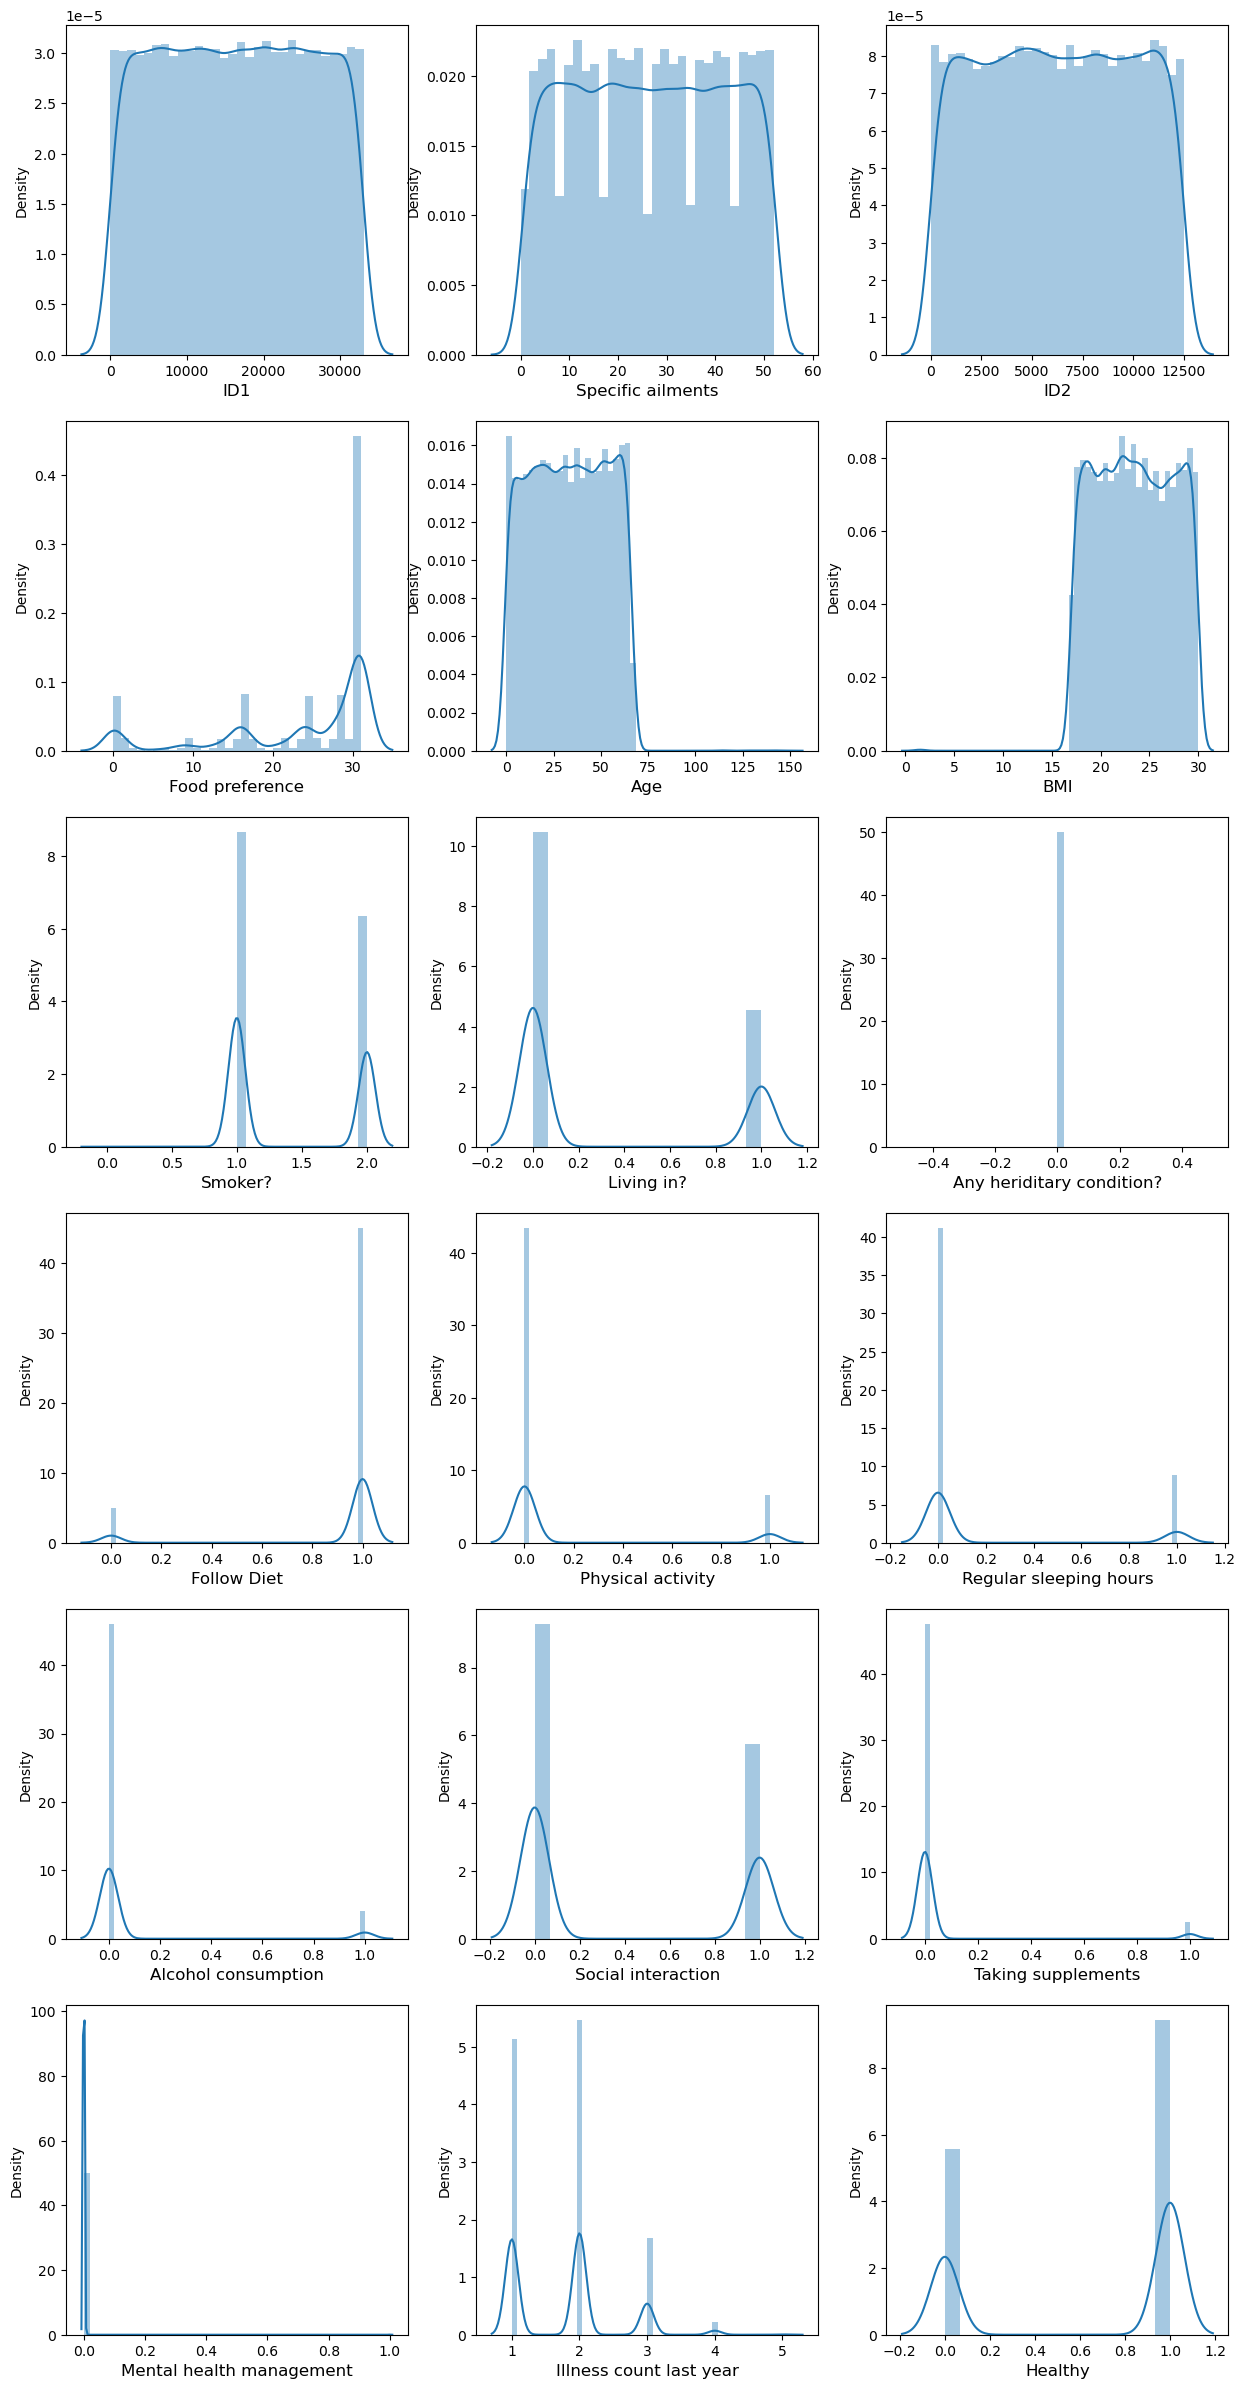

In [30]:
plt.figure(figsize=(15,30))
plotnumber=1

for column in data_train:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

### No skewness  in dist plot

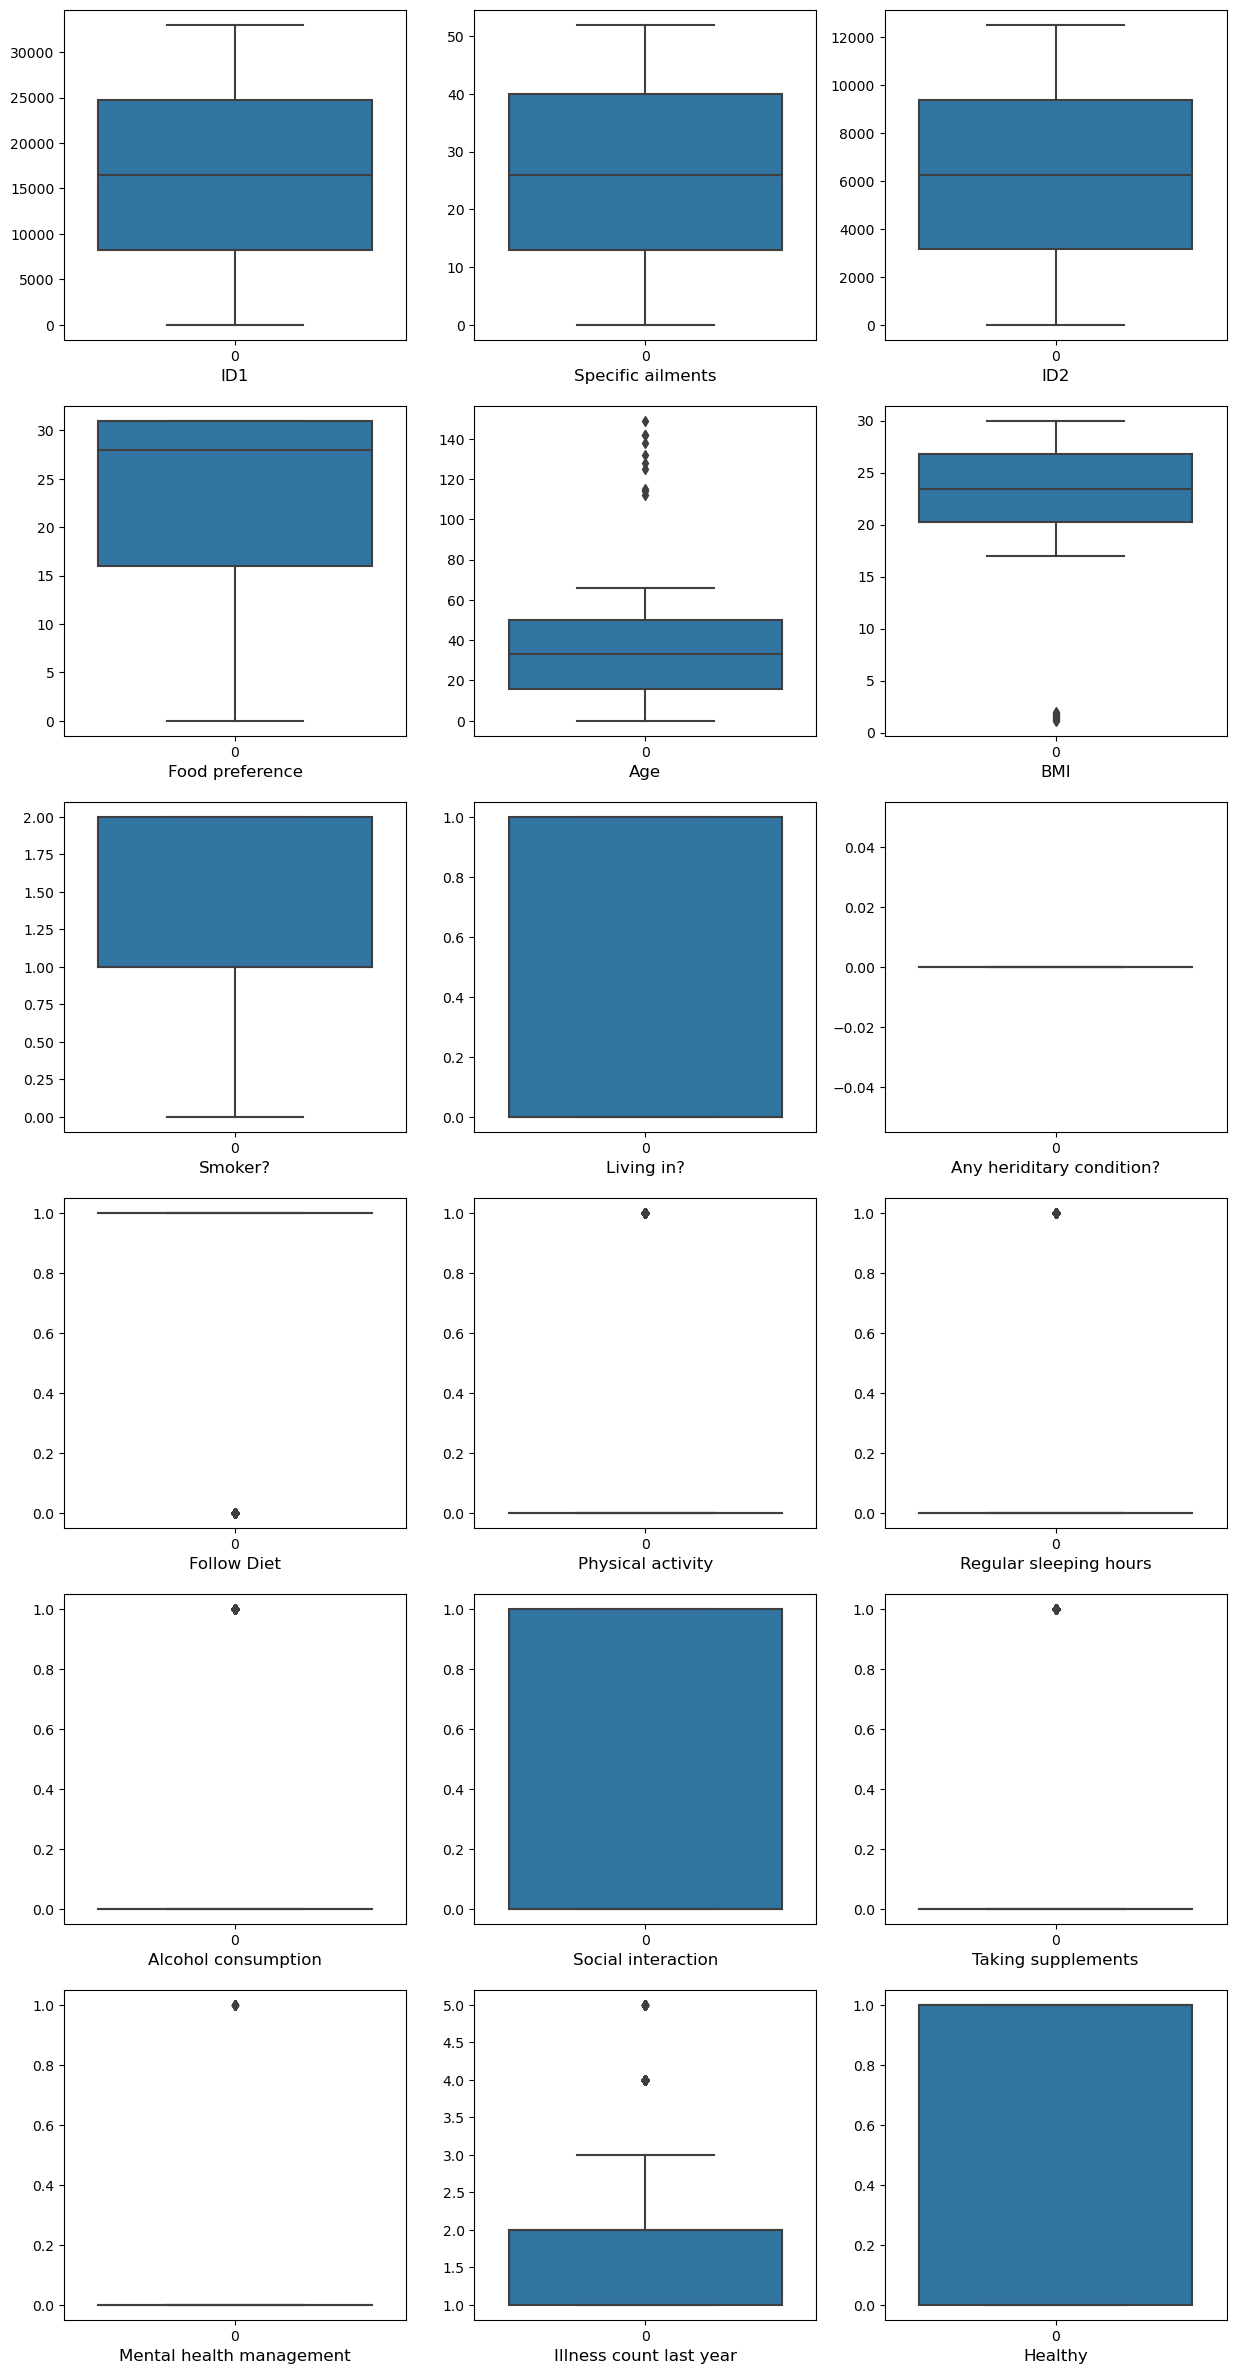

In [31]:
### Checking for outliers
plt.figure(figsize=(15,30))
graph=1

for column in data_train:
    if graph<=18:
        ax=plt.subplot(6,3,graph)
        sns.boxplot(data = data_train[column],orient="v")
        plt.xlabel(column,fontsize=12)
    graph+=1
plt.show()

### Age and BMI are the columns which are having outliers

### Data Preprocessing

In [32]:
## Removing outliers

#quantile 1
q1 = data_train.quantile(0.25)
#quantile 3
q3 = data_train.quantile(0.75)

IQR = q3-q1
IQR

ID1                          16449.750000
Specific ailments               27.000000
ID2                           6240.250000
Food preference                 15.000000
Age                             34.000000
BMI                              6.553496
Smoker?                          1.000000
Living in?                       1.000000
Any heriditary condition?        0.000000
Follow Diet                      0.000000
Physical activity                0.000000
Regular sleeping hours           0.000000
Alcohol consumption              0.000000
Social interaction               1.000000
Taking supplements               0.000000
Mental health management         0.000000
Illness count last year          1.000000
Healthy                          1.000000
dtype: float64

#### Outliers detection formula
#### higherside  = q3+(1.5*IQR)
#### lowerside = q3-(1.5*IQR)

In [33]:
itv_high = (q3.Age + 1.5*IQR.Age)
index = np.where(data_train['Age']>itv_high)
data_train = data_train.drop(data_train.index[index])
data_train.reset_index()

,index,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,0,2408,44,2668,31,49,20.500470,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1,25063,39,10363,25,20,26.076580,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,2,26798,29,132,31,1,21.420866,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,3,31907,27,10499,0,30,25.203247,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,4,26412,9,7963,31,40,19.355846,2,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25905,25915,69,12,818,31,58,25.515286,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25906,25916,21001,39,11500,31,16,27.094959,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25907,25917,4263,44,2796,0,8,28.602921,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25908,25918,11208,52,12190,0,52,21.909832,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [34]:
itv_high = (q3.BMI + 1.5*IQR.BMI)
index = np.where(data_train['BMI']>itv_high)
data_train = data_train.drop(data_train.index[index])
data_train.reset_index()

,index,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,0,2408,44,2668,31,49,20.500470,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1,25063,39,10363,25,20,26.076580,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,2,26798,29,132,31,1,21.420866,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,3,31907,27,10499,0,30,25.203247,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,4,26412,9,7963,31,40,19.355846,2,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25905,25915,69,12,818,31,58,25.515286,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25906,25916,21001,39,11500,31,16,27.094959,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25907,25917,4263,44,2796,0,8,28.602921,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25908,25918,11208,52,12190,0,52,21.909832,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


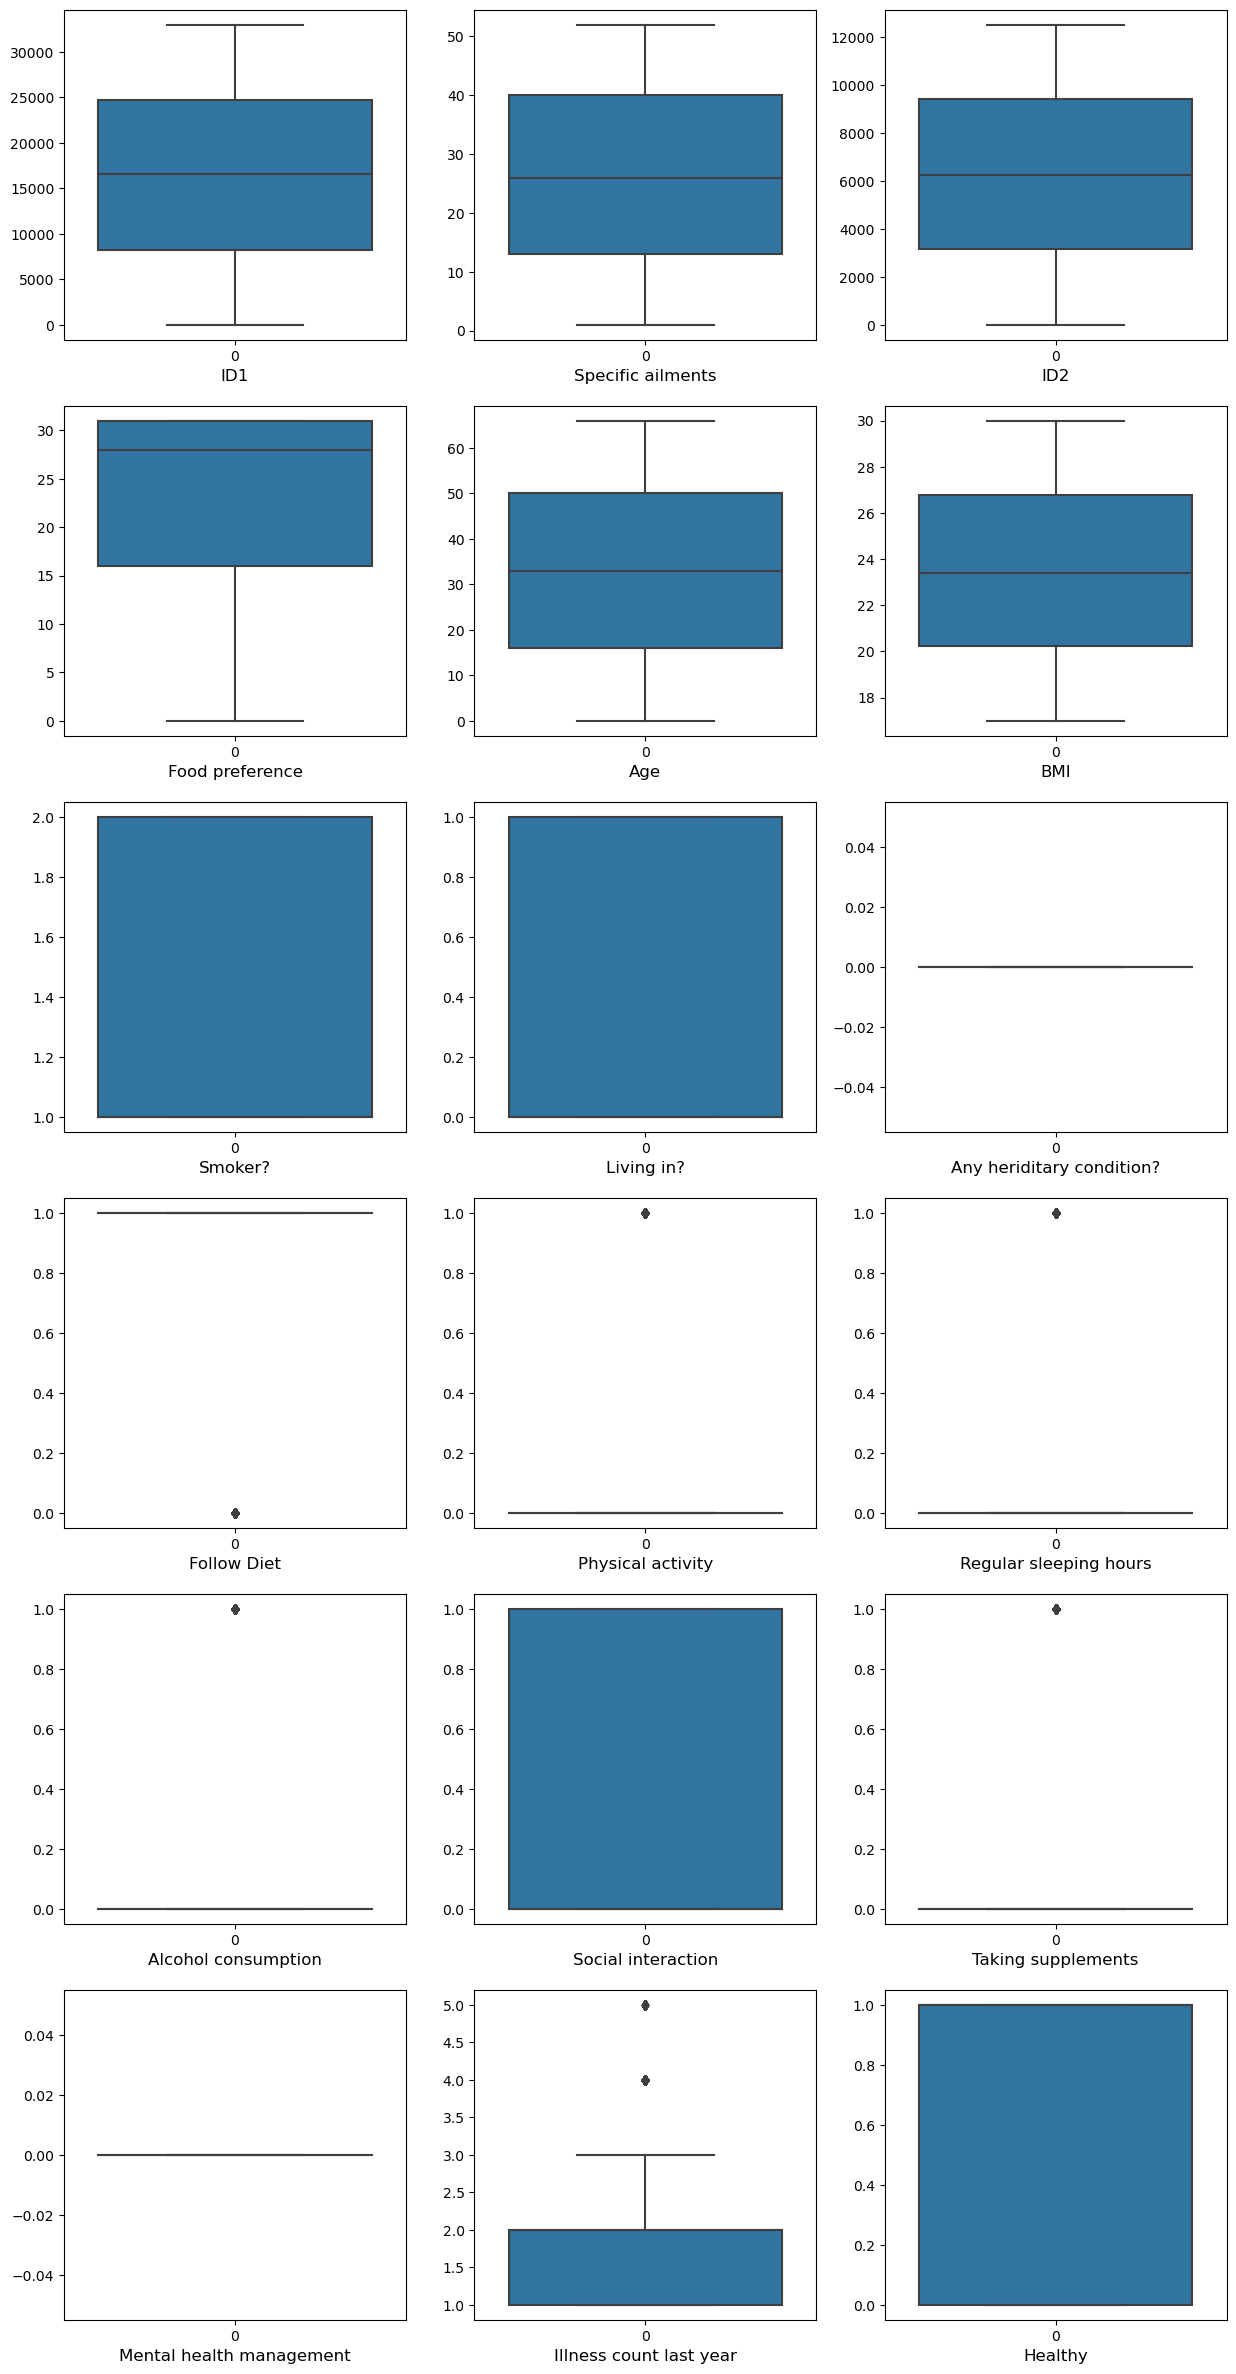

In [35]:
plt.figure(figsize=(15,30))
graph=1

for column in data_train:
    if graph<=18:
        ax=plt.subplot(6,3,graph)
        sns.boxplot(data = data_train[column],orient="v")
        plt.xlabel(column,fontsize=12)
    graph+=1
plt.show()

### Removing Unnecessary columns

In [36]:
data_train.drop(columns=['Any heriditary condition?','ID1','ID2'],axis=1, inplace=True)
data_test.drop(columns=['Any heriditary condition?','ID1','ID2'],axis=1, inplace=True)

#### Data standardization 

In [37]:
X = data_train.drop(columns= ['Healthy'],axis = 1)
Y = data_train['Healthy']

In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X = pd.DataFrame(X_scaled,columns=X.columns)

In [39]:
X

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,1.161918,0.770430,0.812764,-0.788361,-0.857031,-0.658687,0.333333,-0.391533,-0.464609,-0.297059,-0.786425,-0.23206,0.0,-1.010083
1,0.829696,0.169535,-0.678865,0.691807,-0.857031,1.518172,-3.000000,-0.391533,-0.464609,-0.297059,1.271577,-0.23206,0.0,-1.010083
2,0.165252,0.770430,-1.656139,-0.544044,-0.857031,1.518172,0.333333,-0.391533,-0.464609,-0.297059,-0.786425,-0.23206,0.0,-1.010083
3,0.032363,-2.334195,-0.164510,0.459983,-0.857031,-0.658687,0.333333,-0.391533,-0.464609,-0.297059,-0.786425,-0.23206,0.0,-1.010083
4,-1.163637,0.770430,0.349845,-1.092199,1.166819,-0.658687,0.333333,-0.391533,-0.464609,-0.297059,1.271577,-0.23206,0.0,0.314910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25905,-0.964303,0.770430,1.275683,0.542813,1.166819,-0.658687,0.333333,-0.391533,-0.464609,-0.297059,-0.786425,-0.23206,0.0,-1.010083
25906,0.829696,0.770430,-0.884607,0.962134,-0.857031,-0.658687,0.333333,-0.391533,-0.464609,-0.297059,-0.786425,-0.23206,0.0,-1.010083
25907,1.161918,-2.334195,-1.296090,1.362420,-0.857031,-0.658687,0.333333,2.554061,-0.464609,-0.297059,-0.786425,-0.23206,0.0,0.314910
25908,1.693474,-2.334195,0.967070,-0.414248,-0.857031,-0.658687,-3.000000,2.554061,-0.464609,3.366337,-0.786425,-0.23206,0.0,0.314910


### Model Training

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
LR = LogisticRegression()

In [42]:
for i in range(500,700):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_train = LR.predict(x_train)
    pred_test = LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state",i,"Training accuracy",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy",accuracy_score(y_test,pred_test)*100)

At random_state 510 Training accuracy 69.75106136626785
Testing accuracy 69.79930528753377
At random_state 528 Training accuracy 69.70764183712852
Testing accuracy 69.68351987649555
At random_state 544 Training accuracy 70.06464685449633
Testing accuracy 70.0887688151293
At random_state 548 Training accuracy 69.78000771902741
Testing accuracy 69.78000771902741
At random_state 574 Training accuracy 69.73176379776149
Testing accuracy 69.66422230798919
At random_state 576 Training accuracy 69.83307603241991
Testing accuracy 69.76071015052104
At random_state 625 Training accuracy 70.04052489386338
Testing accuracy 70.01157854110383
At random_state 666 Training accuracy 69.89579313006561
Testing accuracy 69.89579313006561
At random_state 694 Training accuracy 69.92473948282516
Testing accuracy 69.93438826707835


### Random_state = 544

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = 544)

### Imbalancing check not needed

In [139]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter

In [140]:
#print('Training outcome - \n',y_train.value_counts())

In [141]:
#Counter(y_train)

In [142]:
#ove_smp = SMOTE(sampling_strategy=0.80)
#x_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

#print('classes after fit counter',format(Counter(y_train_ns)))

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred)*100)

70.0887688151293


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.46      0.53      1910
           1       0.73      0.84      0.78      3272

    accuracy                           0.70      5182
   macro avg       0.68      0.65      0.66      5182
weighted avg       0.69      0.70      0.69      5182



### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
lr1 = DecisionTreeClassifier()
lr1.fit(x_train,y_train)
pred1 = lr1.predict(x_test)
print(accuracy_score(y_test,pred1)*100)

76.59204940177537


In [49]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1910
           1       0.82      0.80      0.81      3272

    accuracy                           0.77      5182
   macro avg       0.75      0.75      0.75      5182
weighted avg       0.77      0.77      0.77      5182



### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
lr2 = RandomForestClassifier()
lr2.fit(x_train,y_train)
pred2 = lr2.predict(x_test)
print(accuracy_score(y_test,pred2)*100)

81.06908529525279


In [51]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1910
           1       0.84      0.86      0.85      3272

    accuracy                           0.81      5182
   macro avg       0.80      0.79      0.79      5182
weighted avg       0.81      0.81      0.81      5182



### Gradient  Boosting 

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
lr3 = GradientBoostingClassifier()
lr3.fit(x_train,y_train)
pred3 = lr3.predict(x_test)
print(accuracy_score(y_test,pred3)*100)

82.24623697414127


In [53]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1910
           1       0.83      0.90      0.86      3272

    accuracy                           0.82      5182
   macro avg       0.82      0.79      0.80      5182
weighted avg       0.82      0.82      0.82      5182



### XGBOOST

In [54]:
from xgboost import XGBClassifier
lr4 = XGBClassifier()
lr4.fit(x_train,y_train)
pred4 = lr4.predict(x_test)
print(accuracy_score(y_test,pred4)*100)

82.61289077576225


In [55]:
pred4[1:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [56]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1910
           1       0.85      0.88      0.86      3272

    accuracy                           0.83      5182
   macro avg       0.82      0.81      0.81      5182
weighted avg       0.82      0.83      0.83      5182



In [57]:
data_test.isnull().sum()

Specific ailments             0
Food preference               3
Age                           0
BMI                           0
Smoker?                       0
Living in?                    0
Follow Diet                 262
Physical activity           262
Regular sleeping hours      262
Alcohol consumption         262
Social interaction          262
Taking supplements          262
Mental health management    262
Illness count last year     262
dtype: int64

In [58]:
data_test['Follow Diet'] = data_test['Follow Diet'].fillna(data_test['Follow Diet'].median())
data_test['Physical activity'] = data_test['Physical activity'].fillna(data_test['Physical activity'].median())
data_test['Regular sleeping hours'] = data_test['Regular sleeping hours'].fillna(data_test['Regular sleeping hours'].median())
data_test['Alcohol consumption'] = data_test['Alcohol consumption'].fillna(data_test['Alcohol consumption'].median())
data_test['Social interaction'] = data_test['Social interaction'].fillna(data_test['Social interaction'].median())
data_test['Taking supplements'] = data_test['Taking supplements'].fillna(data_test['Taking supplements'].median())
data_test['Mental health management'] = data_test['Mental health management'].fillna(data_test['Mental health management'].median())
data_test['Illness count last year'] = data_test['Illness count last year'].fillna(data_test['Illness count last year'].median())
data_test['Food preference'] = data_test['Food preference'].fillna(data_test['Food preference'].mode()[0])

In [59]:
data_test.isnull().sum()

Specific ailments           0
Food preference             0
Age                         0
BMI                         0
Smoker?                     0
Living in?                  0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
dtype: int64

In [60]:
#data_test['Any heriditary condition?'] = lab_enc.fit_transform(data_test['Any heriditary condition?'])
data_test['Living in?'] = lab_enc.fit_transform(data_test['Living in?'])
data_test['Smoker?'] = lab_enc.fit_transform(data_test['Smoker?'])
data_test['Food preference'] = lab_enc.fit_transform(data_test['Food preference'])

In [61]:
scaled = scalar.fit_transform(data_test)
data_test = pd.DataFrame(scaled,columns=data_test.columns)

### Using XGBoost to predict

In [62]:
prediction = lr4.predict(data_test)

In [63]:
prediction[1:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1])

In [64]:
submission_df=pd.DataFrame(data=prediction,columns=['predictions'])
submission_df.to_csv( 'new_model.csv' ,index=False,header=True)
print(submission_df.shape)

(6480, 1)


### Using Hyperparameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV

a1,a2,b1,b2 = train_test_split(X,Y,test_size= 0.20,random_state=0)
params = {'learning_rate':np.arange(0.2,0.4,0.1),
         'n_estimators':[40],
         'max_depth':range(6,18)}
GCV2 = GridSearchCV(lr4,param_grid = params)
GCV2.fit(a1,b1)
print('best para',GCV2.best_params_)
rf = GCV2.best_estimator_
rf.fit(a1,b1)
y_pred = rf.predict(a2)
accuracy_score(b2,y_pred)

best para {'learning_rate': 0.30000000000000004, 'max_depth': 6, 'n_estimators': 40}


0.8317252026244694

In [66]:
prediction1 = rf.predict(data_test)

In [67]:
submission_df=pd.DataFrame(data=prediction,columns=['predictions'])
submission_df.to_csv( 'new_model23.csv' ,index=False,header=True)
print(submission_df.shape)

(6480, 1)
